<a href="https://colab.research.google.com/github/Mark-Miller64/HW1_CSC302_Python-Visualization/blob/main/Copy_of_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
df.head()


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

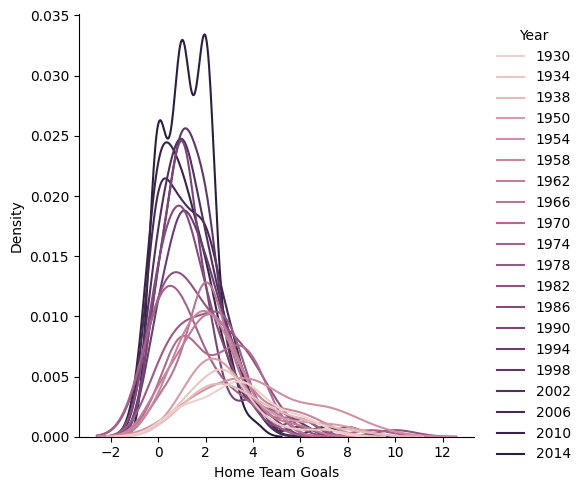

In [ ]:
sns.displot(data=df, x="Home Team Goals", hue="Year", kind="kde")
plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

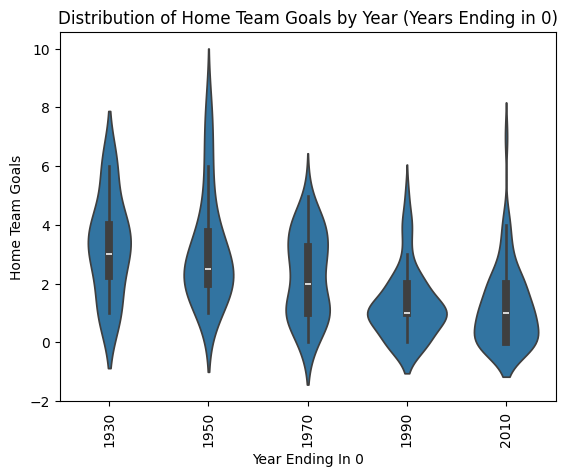

In [ ]:
df_filtered = df[df['Year'] % 10 == 0]
sns.violinplot(data=df_filtered, x="Year", y="Home Team Goals")
plt.xticks(rotation=90)
plt.title('Distribution of Home Team Goals by Year )
plt.xlabel('Year Ending In 0')
plt.ylabel('Home Team Goals')
plt.show()

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [ ]:
!pip install joypy

<ipython-input-51-6b7bd365e401>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


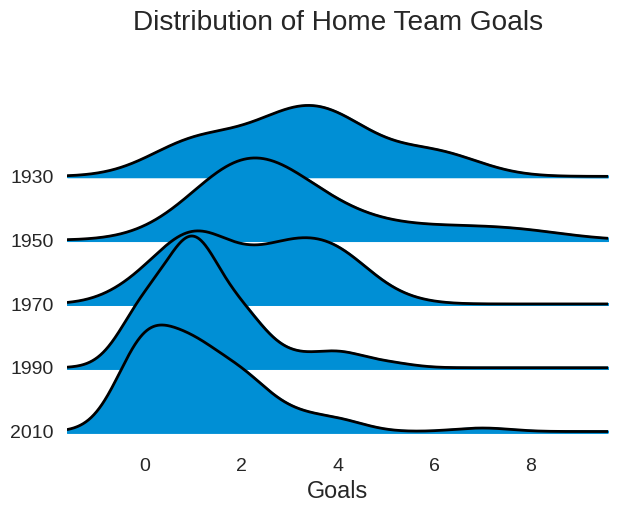

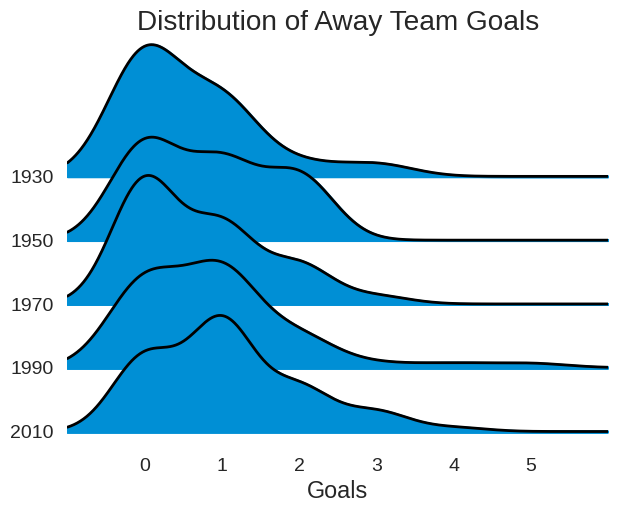

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
from joypy import joyplot
import numpy as np


# Prepare data for joypy
data_home = [df_filtered[df_filtered['Year'] == year]['Home Team Goals'] for year in df_filtered['Year'].unique()]
data_away = [df_filtered[df_filtered['Year'] == year]['Away Team Goals'] for year in df_filtered['Year'].unique()]
labels = [str(year) for year in df_filtered['Year'].unique()]

plt.style.use('seaborn-white')

# Plot distributions for Home Team Goals
joyplot(data=data_home, labels=labels, linewidth=2, legend=True)
plt.title('Distribution of Home Team Goals')
plt.xlabel('Goals')
plt.ylabel('Density')

# Plot distributions for Away Team Goals
joyplot(data=data_away, labels=labels, linewidth=2, legend=True)
plt.title('Distribution of Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Density')

#plt.tight_layout()
plt.show()

print(plt.style.available)





**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



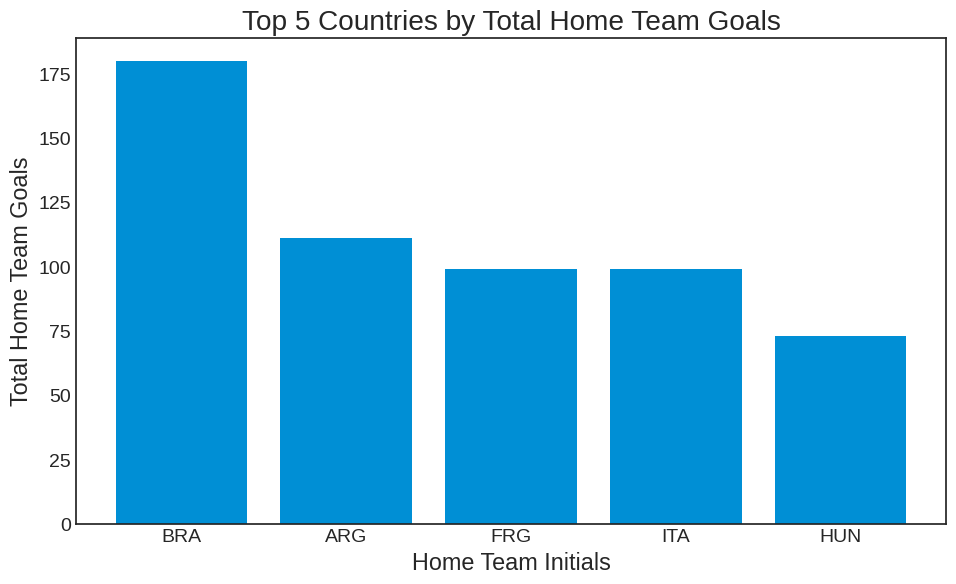

In [ ]:
home_team_goals = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
top_5 = home_team_goals.sort_values(by='Home Team Goals', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5['Home Team Initials'], top_5['Home Team Goals'])
plt.xlabel('Home Team Initials')
plt.ylabel('Total Home Team Goals')
plt.title('Top 5 Countries by Total Home Team Goals')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



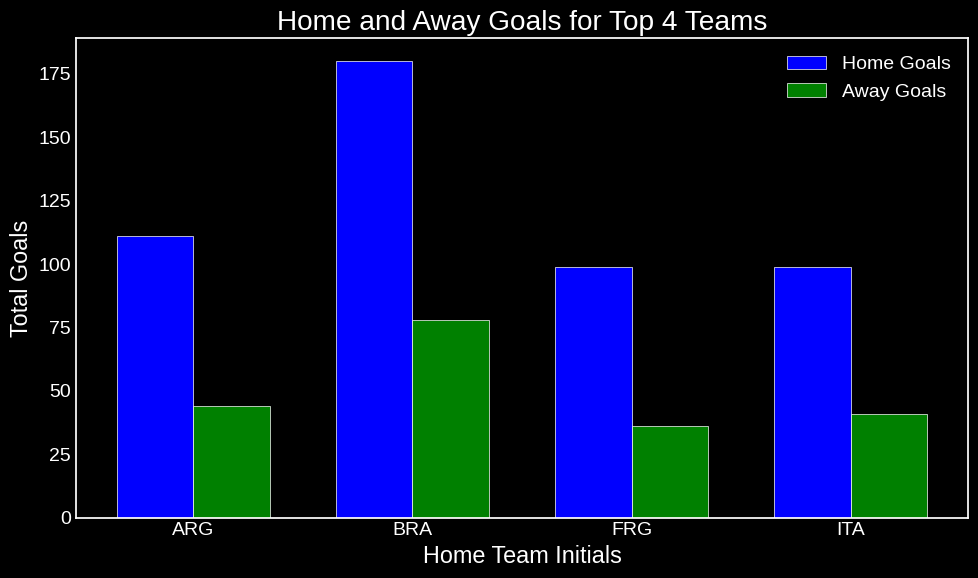

In [ ]:
# Get the toimport matplotlib.pyplot as plt

# Get the top 4 countries
top_4_initials = home_team_goals.sort_values(by='Home Team Goals', ascending=False).head(4)['Home Team Initials'].tolist()

# Extract rows for the top 4 countries
df_top4 = df[df['Home Team Initials'].isin(top_4_initials)]

# Calculate total home and away goals for each team
home_goals = df_top4.groupby('Home Team Initials')['Home Team Goals'].sum()
away_goals = df_top4.groupby('Home Team Initials')['Away Team Goals'].sum()

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = range(len(home_goals))
r2 = [x + bar_width for x in r1]

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(r1, home_goals, color='b', width=bar_width, edgecolor='white', label='Home Goals')
ax.bar(r2, away_goals, color='g', width=bar_width, edgecolor='white', label='Away Goals')

# Add labels, title, and legend
ax.set_xlabel('Home Team Initials')
ax.set_ylabel('Total Goals')
ax.set_title('Home and Away Goals for Top 4 Teams')
ax.set_xticks([r + bar_width/2 for r in range(len(home_goals))])
ax.set_xticklabels(home_goals.index)
ax.legend()

plt.tight_layout()
plt.style.use('dark_background')
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [ ]:
!pip install seaborn_qqplot

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


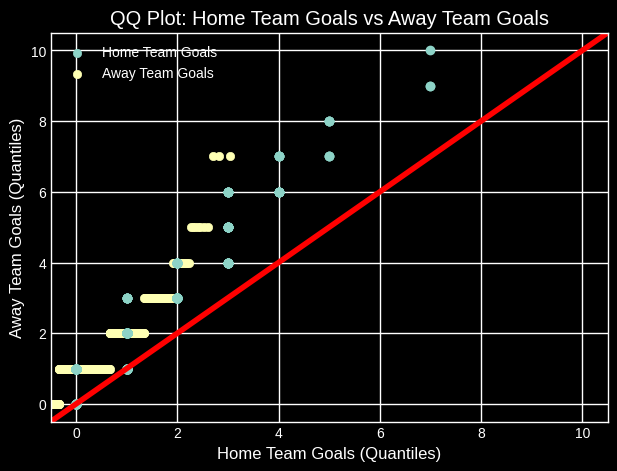

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract Home Team Goals and Away Team Goals
home_goals = df['Home Team Goals']
away_goals = df['Away Team Goals']

# Create QQ Plot
pp_x = sm.ProbPlot(home_goals)
pp_y = sm.ProbPlot(away_goals)

# Get line colors from default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
line_color_home = colors[0]  # Usually blue
line_color_away = colors[1]  # Usually orange

fig = pp_x.qqplot(other=pp_y, line='45', c=line_color_home)  # Set color for home goals

# Plot away goals points with correct color
plt.scatter(pp_y.theoretical_quantiles, pp_y.sample_quantiles, c=line_color_away)

# Customize plot
plt.title("QQ Plot: Home Team Goals vs Away Team Goals")
plt.xlabel("Home Team Goals (Quantiles)")
plt.ylabel("Away Team Goals (Quantiles)")

# Manually add legend with matching colors
plt.scatter([], [], c=line_color_home, label='Home Team Goals')
plt.scatter([], [], c=line_color_away, label='Away Team Goals')
plt.legend()

plt.style.use('dark_background')
plt.show()

The plotted points are,in general,following the 45 degree normal distribution line so they are similar distribution lines, but this shows that home teams have a tendency to score more goals indicated by the plot points on the high end of the tail. The grouping at the low end of the tail shows less away team goals.